In [3]:
# В этом модуле мы продолжим эту тему и рассмотрим очистку данных, которая включает
# в себя следующие этапы:

# Работа с пропущенными значениями.
# Очистка данных от пропусков.
# Удаление признаков и записей, которые не несут полезной информации.

In [4]:
# Очистка данных (data cleaning) — это процесс обнаружения и удаления (или исправления) повреждённых,
# ложных или неинформативных записей таблицы или целой базы данных.
# Процесс состоит из двух этапов: поиск и ликвидация (или редактирование).

In [5]:
# Вспомните поговорку: «мусор на входе — мусор на выходе»

In [6]:
# Цели модуля:

# Рассмотреть методы определения пропусков в данных и основные методики работы с ними.
# Познакомиться с методами поиска выбросов в данных и рассмотреть основные практики работы с ними.
# Научиться определять дубликаты и неинформативные признаки в данных и избавляться от них.

2. Знакомство с новыми данными: данные о квартирах от Сбера

In [7]:
# Импортируем библиотеки, которые нам понадобятся (pandas для работы с данными,
# numpy для математических преобразований, matplotlib и seaborn для визуализации):

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [8]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [9]:
sber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   full_sq                                30471 non-null  int64  
 2   life_sq                                24088 non-null  float64
 3   floor                                  30304 non-null  float64
 4   sub_area                               30471 non-null  object 
 5   preschool_quota                        23783 non-null  float64
 6   preschool_education_centers_raion      30471 non-null  int64  
 7   school_quota                           23786 non-null  float64
 8   school_education_centers_raion         30471 non-null  int64  
 9   school_education_centers_top_20_raion  30471 non-null  int64  
 10  hospital_beds_raion                    16030 non-null  float64
 11  he

In [10]:
sber_data.tail()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


In [11]:
# Сколько районов Москвы и Московской области представлено в данных?
sber_data.nunique()

id                   30471
full_sq                211
life_sq                175
floor                   41
sub_area               146
                     ...  
theater_km           11843
museum_km            11852
ecology                  5
mosque_count_1000        2
price_doc             9296
Length: 61, dtype: int64

In [12]:
# Чему равна максимальная цена квартир (price_doc)? Введите это число полностью,
# без округлений.
sber_data['price_doc'].max()

111111112

<AxesSubplot: title={'center': 'price_doc'}, xlabel='ecology'>

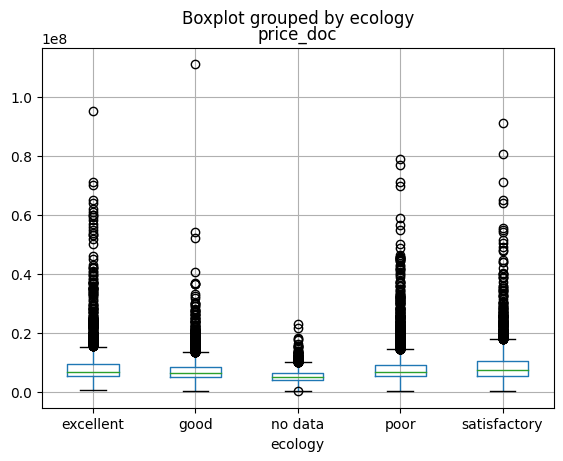

In [13]:
# Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры.
# Постройте коробчатую диаграмму цен на квартиры (price_doc) в зависимости от уровня 
# экологической обстановки в районе (ecology). Какой уровень ценится на рынке меньше всего?

# grouped_sberdata = sber_data.groupby(by='ecology').mean()
sber_data.boxplot(
    column='price_doc',
    by='ecology'
)
# sber_data.plot(
#     kind='box',
    
#     y='ecology'
# )

# fig = plt.figure(figsize=(6, 4))
# axes = fig.add_axes([0, 0, 1, 1])
# axes.boxplot(
#     sber_data,
    
# )

<AxesSubplot: xlabel='price_doc', ylabel='ecology'>

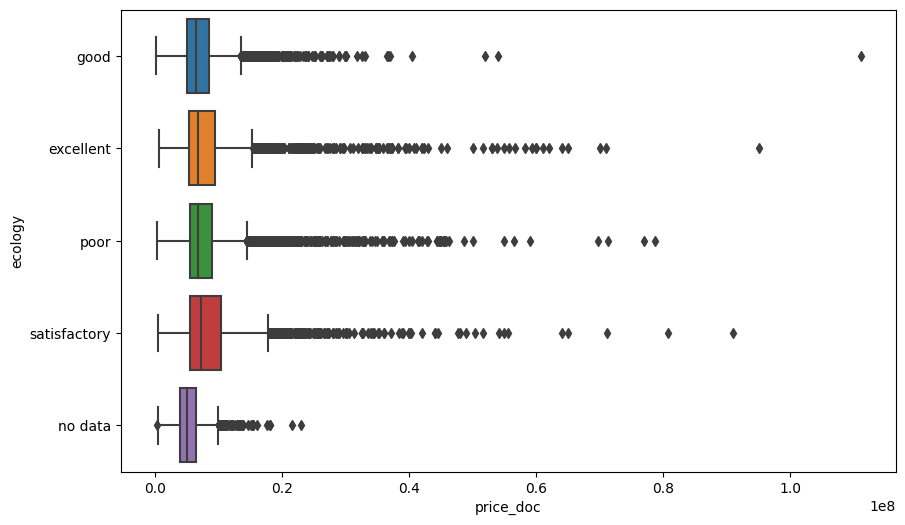

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    sber_data,
    x='price_doc',
    y='ecology'
)

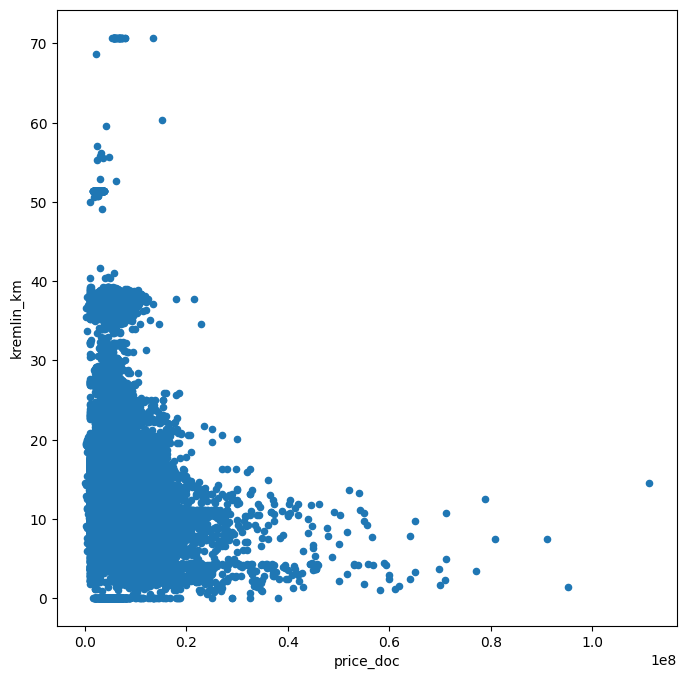

In [15]:
# Постройте диаграмму рассеяния, которая покажет, как цена на квартиру
# (price_doc) связана с расстоянием до центра Москвы (kremlin_km).
# Выберите все верные утверждения.

sber_data.plot(
    kind='scatter',
    x='price_doc',
    y='kremlin_km',
    figsize=(8, 8)
);

3. Работа с пропусками: как их обнаружить?

In [16]:
# В pandas пропуски обозначаются специальным символом NaN (Not-a-Number — «не число»).

# В библиотеке pandas специально для этого реализован метод isnull(). 
# Этот метод возвращает новый DataFrame, в ячейках которого стоят булевы значения
# True и False. True ставится на месте, где ранее находилось значение NaN.

display(sber_data.isnull())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


СПИСОК СТОЛБЦОВ С ПРОПУСКАМИ

In [17]:
# Первый способ — это вывести на экран названия столбцов, где число пропусков больше 0.

cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
cols_with_null

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

In [18]:
# большое число пропусков (более 47 %) в столбце hospital_beds_raion
# (количество больничных коек в округе). 

# Далее у нас идут столбцы с числом пропусков чуть больше 20 %: 

# preschool_quota (число мест в детском саду в районе);
# school_quota (число мест в школах в районе);
# life_sq (жилая площадь здания в квадратных метрах). 
# Менее одного процента пропусков содержат признаки:

# floor (число этажей в доме);
# metro_min_walk (время от дома до ближайшего метро пешком в минутах);
# metro_km_walk (расстояние до ближайшего метро в километрах);
# railroad_station_walk_km (расстояние до ближайшей ж. д. станции в километрах);
# railroad_station_walk_min (время до ближайшей ж. д. станции пешком в минутах). 

In [19]:
# столбец, в котором почти половина данных пропущена, не может дать нам полезной
# информации при прогнозировании. Если мы попытаемся его как-то исправить, мы можем
# только навредить и «нафантазировать» лишнего, поэтому от него, возможно, стоит избавиться.
# А вот столбцы с менее 1 % пропусков легко можно скорректировать: заполнить отсутствующие
# значения какими-то числами.

СТОЛБЧАТАЯ ДИАГРАММА ПРОПУСКОВ

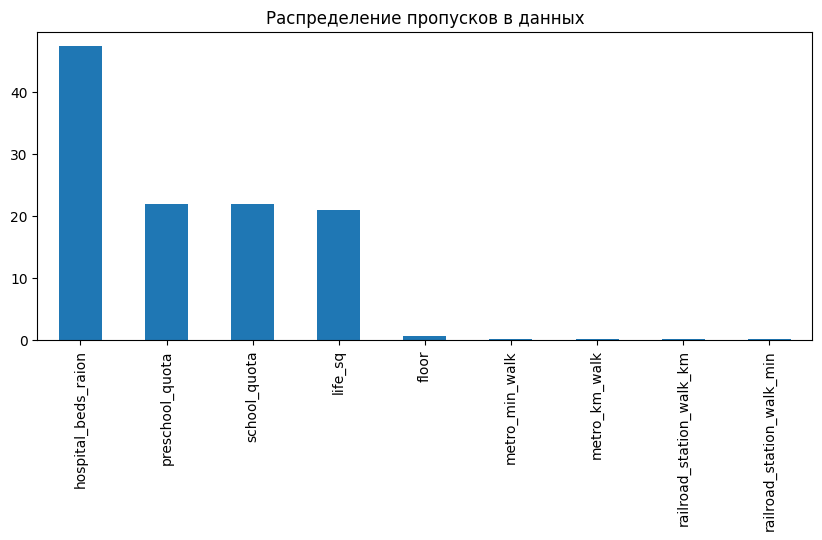

In [20]:
# Можно воспользоваться столбчатой диаграммой, чтобы визуально оценить соотношение
# числа пропусков к числу записей. Самый быстрый способ построить её — использовать метод plot():

cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

ТЕПЛОВАЯ КАРТА ПРОПУСКОВ

In [21]:
# Её часто используют, когда столбцов с пропусками не так много (меньше 10). Она
# позволяет понять не только соотношение пропусков в данных, но и их характерное
# местоположение в таблице. 

In [22]:
# Для создания такой тепловой карты можно воспользоваться результатом метода isnull().
# Ячейки таблицы, в которых есть пропуск, будем отмечать жёлтым цветом, а остальные — синим. 
# Для этого создадим собственную палитру цветов тепловой карты с помощью метода color_pallete()
# из библиотеки seaborn.

<AxesSubplot: >

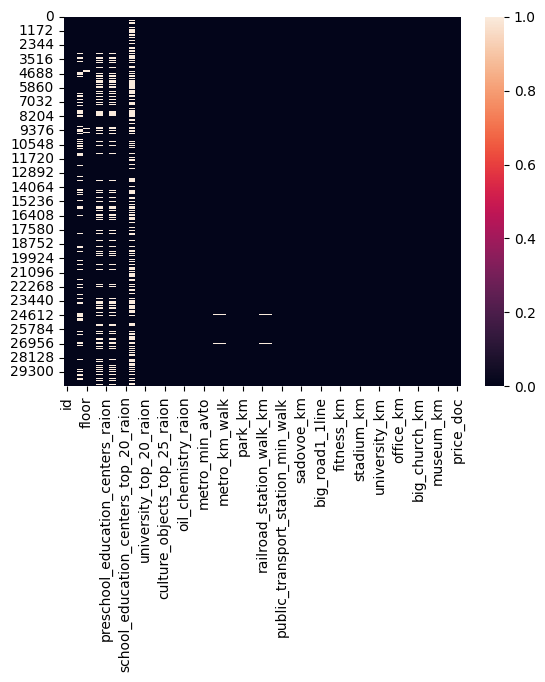

In [23]:
# Делаю сам быстрый график

sns.heatmap(
    sber_data.isnull()
)


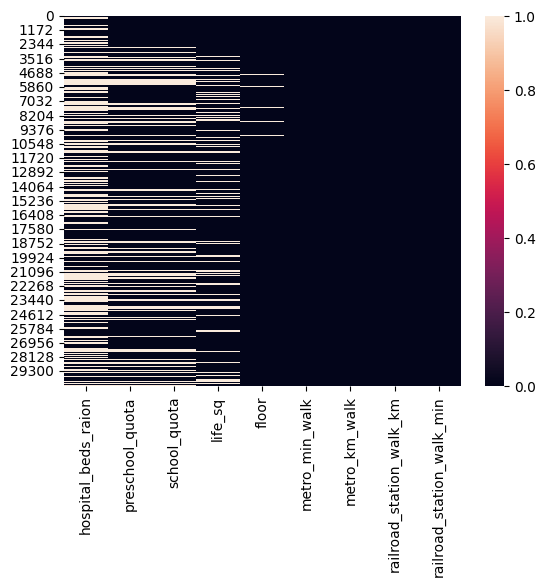

In [24]:
# fig = plt.figure(figsize=(10, 8))
sns.heatmap(
    sber_data[cols_with_null.index].isnull()
);

In [25]:
sber_data[cols_with_null.index].isnull()

,hospital_beds_raion,preschool_quota,school_quota,life_sq,floor,metro_min_walk,metro_km_walk,railroad_station_walk_km,railroad_station_walk_min
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
30466,True,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False
30468,True,True,True,True,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False


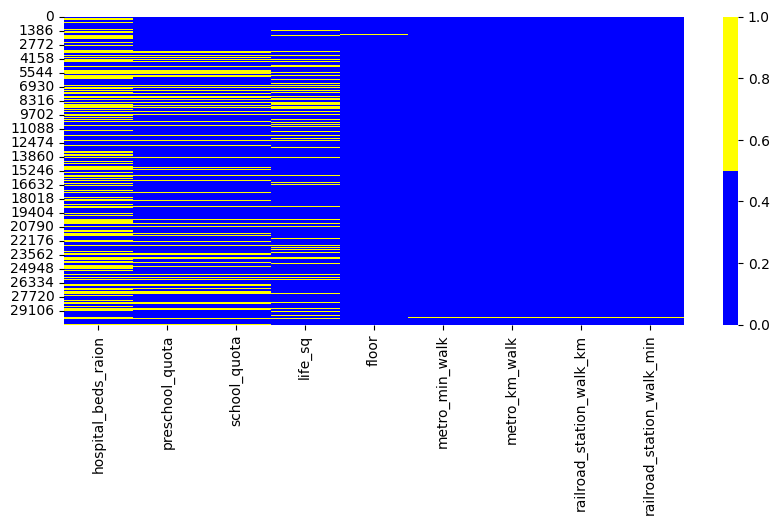

In [26]:
# Далее график из курса

colors = ['blue', 'yellow']
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors)
);

In [27]:
# На полученной тепловой карте мы не видим чётких процентных соотношений для числа пропусков
# в данных, однако мы можем увидеть места их концентрации в таблице. Например, видно, что
# признаки preschool_quota и school_quota очень сильно связаны друг с другом по части пропусков:
# во всех записях, где хотя бы один не определён, не указан и второй (жёлтые линии для двух
# этих признаков полностью совпадают друг с другом).

4. Работа с пропусками: методы обработки

МЕТОДЫ ОБРАБОТКИ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ

In [28]:
# Наибольшая сложность в очистке данных от пропусков заключается в выборе метода их обработки.
# Все методы, которые мы рассмотрим, по сути являются простыми эвристиками,
# без математического обоснования. 

In [29]:
# Не существует общего решения проблемы с отсутствующими данными. Для каждого конкретного
# случая приходится подбирать наиболее подходящие методы или их комбинации. При этом
# каждая модель уникальна и часто предполагает случайность, поэтому невозможно предсказать
# заранее, какая комбинация методов сработает на ваших данных лучше всего.

ОТБРАСЫВАНИЕ ЗАПИСЕЙ И ПРИЗНАКОВ

In [30]:
# Она предполагает простое удаление записей или признаков, в которых содержатся пропуски. 
# Здесь важно правильно выбрать ось удаления: если мы избавимся от большого числа строк, 
# то рискуем потерять важные данные, а если мы удалим столбцы, то можем потерять важные признаки.

In [31]:
# Специалисты рекомендуют при использовании метода удаления придерживаться следующих 
# правил: удаляйте столбец, если число пропусков в нем более 30-40 %. В остальных 
# случаях лучше удалять записи.

In [32]:
# Для удаления строк и столбцов будем использовать метод dropna(),
# который позволяет удалять пропуски с тонким подходом к настройке.

# axis — ось, по которой производится удаление (по умолчанию 0 — строки).
# how — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск,
# стоит по умолчанию; all — если во всех столбцах есть пропуски). 
# thresh — порог удаления. Определяет минимальное число непустых значений в строке/столбце,
# при котором она/он сохраняется. Например, если мы установим thresh в значение 2,
# то мы удалим строки, где число пропусков больше чем \(n-2\),
# где \(n\) — число признаков (если \(axis=0\)).

In [33]:
# удаляем столбцы с числом пропусков более 30 %.

#создаем копию исходной таблицы
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(axis=1, thresh=thresh)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(axis=0, how='any')
#отображаем результирующую долю пропусков
drop_data.isnull().mean()

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [34]:
print(drop_data.shape)

(20888, 60)


ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ

In [35]:
# Чаще всего пустые места заполняют средним/медианой/модой для числовых признаков 
# и модальным значением для категориальных признаков.

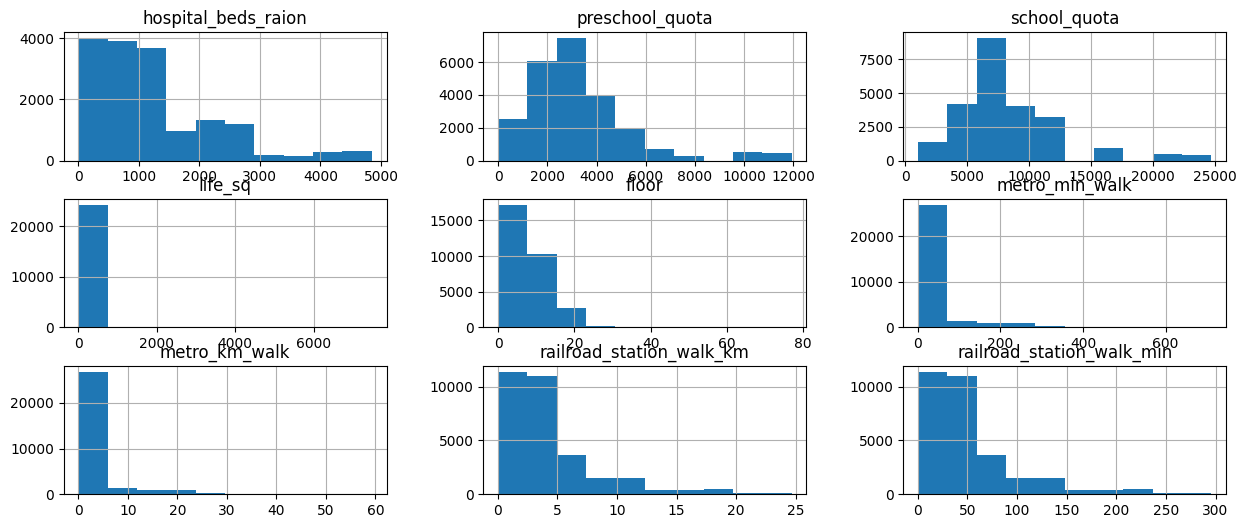

In [36]:
# Вся сложность заключается в выборе метода заполнения. Важным фактором при выборе
# метода является распределение признаков с пропусками. Давайте выведем их на экран.

# В pandas это можно сделать с помощью метода hist():

cols = cols_with_null.index

sber_data.hist(
    column=cols,
    figsize=(15,6)
);

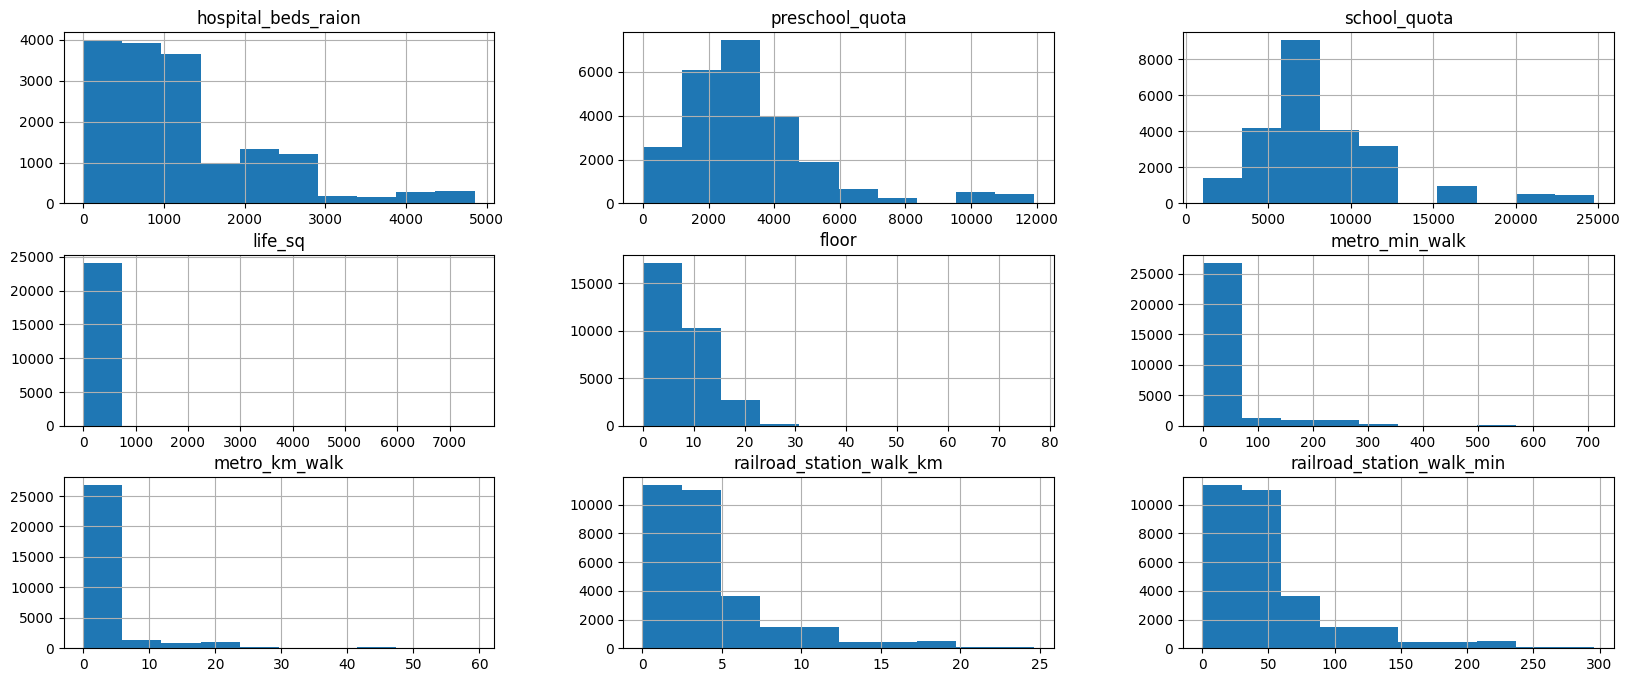

In [37]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20,8));

##### Итак, рассмотрим несколько рекомендаций.

Для распределений, похожих на логнормальное, где пик близ нуля, а далее наблюдается постепенный спад частоты, высока вероятность наличия выбросов (о них мы поговорим чуть позже). Математически доказывается, что среднее очень чувствительно к выбросам, а вот медиана — нет. Поэтому предпочтительнее использовать медианное значение для таких признаков.
У нас это признаки floor, metro_min_walk, metro_km_walk, railroad_station_walk_km, railroad_station_walk_min.

Если признак числовой и дискретный (например, число этажей, школьная квота), то их заполнение средним/медианой является ошибочным, так как может получиться число, которое не может являться значением этого признака. Например, количество этажей — целочисленный признак, а расчёт среднего может дать 2.871. Поэтому такой признак заполняют либо модой, либо округляют до целого числа (или нужного количества знаков после запятой) среднее/медиану.

Категориальные признаки заполняются либо модальным значением, либо, если вы хотите оставить информацию о пропуске в данных, значением 'unknown'. На наше счастье, пропусков в категориях у нас нет.

Иногда в данных бывает такой признак, основываясь на котором, можно заполнить пропуски в другом. Например, в наших данных есть признак full_sq (общая площадь квартиры). Давайте исходить из предположения, что, если жилая площадь (life_sq) неизвестна, то она будет равна суммарной площади!

Заполнение значений осуществляется с помощью метода fillna().
Главный параметр метода — value (значение, на которое происходит заполнение данных в столбце).

In [38]:
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

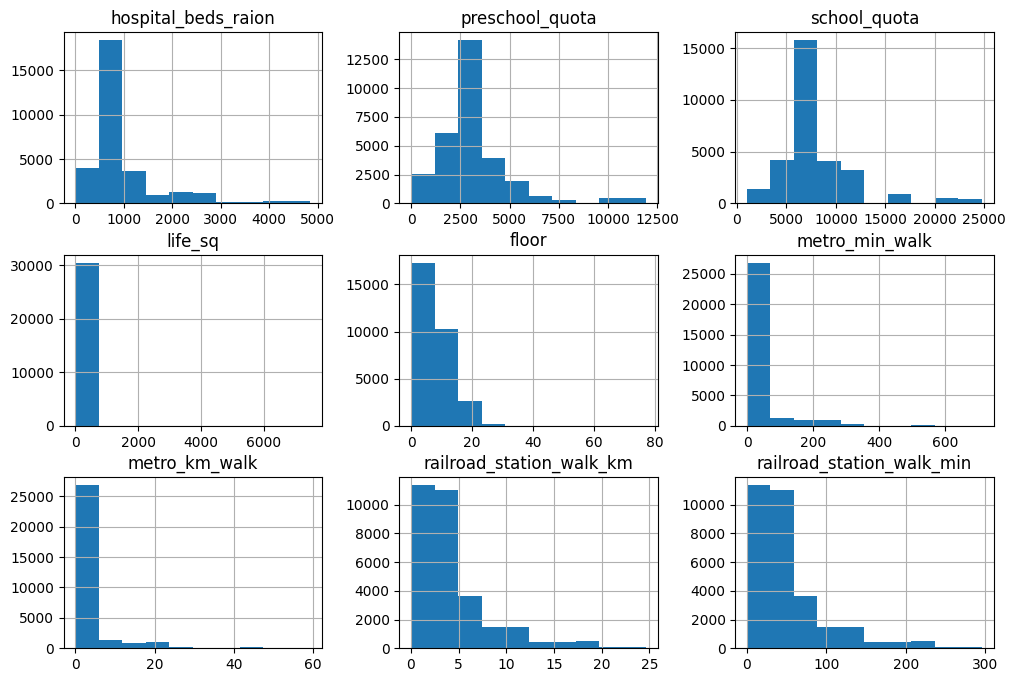

In [39]:
# Посмотрим, на то, как изменились распределения наших признаков:
cols = cols_with_null.index
fill_data[cols].hist(figsize=(12, 8));

Обратите внимание на то, как сильно изменилось распределение для признака hospital_beds_raion. Это связано с тем, что мы заполнили модальным значением почти 47 % общих данных. В результате мы кардинально исказили исходное распределение признака, что может плохо сказаться на модели.

ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ С ДОБАВЛЕНИЕМ ИНДИКАТОРА

In [40]:
# Эта эвристика пытается снизить влияние искажения признака, указав модели на места,
# где мы «нафантазировали» данные.

Посмотрим на реализацию. Как обычно, создадим копию indicator_data исходной таблицы. В цикле пройдёмся по столбцам с пропусками и будем добавлять в таблицу новый признак (с припиской "was_null"), который получается из исходного с помощью применения метода isnull(). После чего произведём обычное заполнение пропусков, которое мы совершали ранее, и выведем на экран число отсутствующих значений в столбце, чтобы убедиться в результате:

In [41]:
#создаем копию исходной таблицы
indicator_data = sber_data.copy()
# в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

КОМБИНИРОВАНИЕ МЕТОДОВ

In [42]:
#создаём копию исходной таблицы
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(thresh=m-2, axis=0)

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [43]:
display(combine_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26800 entries, 0 to 30470
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     26800 non-null  int64  
 1   full_sq                                26800 non-null  int64  
 2   life_sq                                26800 non-null  float64
 3   floor                                  26800 non-null  float64
 4   sub_area                               26800 non-null  object 
 5   preschool_quota                        26800 non-null  float64
 6   preschool_education_centers_raion      26800 non-null  int64  
 7   school_quota                           26800 non-null  float64
 8   school_education_centers_raion         26800 non-null  int64  
 9   school_education_centers_top_20_raion  26800 non-null  int64  
 10  healthcare_centers_raion               26800 non-null  int64  
 11  un

None

Вы можете придумывать свои собственные комбинации методов и использовать их для борьбы с пропусками, главное — найти баланс между потерей информации и её искажением.

Примечание. Стоит отметить, что предположение о том, что жилая площадь равна общей, слишком тривиально. Порассуждаем логически. Очевидно, что обычно в квартире есть хотя бы санузел, который не учитывается в жилой площади, и тогда жилая площадь будет меньше общей. Если взять соотношение жилой площади к общей площади и построить boxplot в log-масштабе, то медиана будет на около 0.6, а значение 1 (жилая = общая) не войдёт даже в последний квартиль. Поэтому в реальной задаче такая оценка соотношения площадей является не совсем корректной.

### <center> РЕЗЮМЕ ПО МЕТОДАМ РАБОТЫ С ПРОПУСКАМИ

Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных. Однако если этот признак очень важен для прогнозирования, вам придётся поколдовать над ним, чтобы «заплатки», которыми вы закрываете пропуски, выглядели правдоподобно.

Заполняйте данные с умом! Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.

Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.

Если вам позволяют сроки вашего проекта, попробуйте несколько кардинально разных подходов работы с пропусками.

### <center> ДРУГИЕ МЕТОДЫ ЗАПОЛНЕНИЯ ОТСУТСТВУЮЩИХ ЗНАЧЕНИЙ

Можно предсказать пропуски с помощью модели. Такой подход основывается на том, что вы считаете признак с отсутствующими значениями целевым, а остальные признаки — факторами и строите модель, предсказывающую пропуски в данных. На практике часто для заполнения «дыр» в данных используют метод ближайшего соседа (KNN) или линейную регрессию.

Ещё один подход — заполнение, основанное на группах. Можно сгруппировать данные по некоторым признакам и заполнять константой, полученной в группе. Например, в наших данных для признака жилой площади можно было бы заполнять пропуски средней площадью квартир в районе.

## 5. Выбросы: почему появляются и чем опасны?

In [44]:
# Ещё одна типичная проблема для больших данных — это наличие в них выбросов. 

Выброс (аномалия) — это наблюдение, которое существенно выбивается из общего распределения и сильно отличается от других данных.

→ Мы с вами уже сталкивались с аномалиями. Вспомните данные о коронавирусе и вот этот график ежедневной заболеваемости в мире:

Тот самый пик в 1.4 млн заболевших в день определённо можно считать аномальным. Перед тем, как пытаться спрогнозировать такой временной ряд, рекомендуется заменить это наблюдение чем-то адекватным: например, средним между наблюдениями справа и слева от аномалии.

ЧЕМ ОПАСНЫ ВЫБРОСЫ?

Так или иначе, проблема выбросов состоит в том, что они могут «шокировать» модель. 

ПРИЧИНЫ ПОЯВЛЕНИЯ ВЫБРОСОВ


Ошибка ввода данных. Как и с пропусками, здесь играет роль человеческий фактор. Ввести лишний «ноль» на клавиатуре и не заметить этого — нередкий случай.


Ошибки отбора выборки. Когда начинающие специалисты составляют обучающую выборку для моделирования, они часто допускают ошибку, не выделив в отдельную группу часть данных. Типичный пример: смешать вместе данные об уровне жизни среднего класса, опрошенного на улице, и добавить туда людей из списка Forbes.


Преднамеренное искажение или мошенничество. Пользователи приложения часто намеренно указывают неверные данные о себе. Например, прибавляют к своему возрасту лишнюю сотню лет, создавая головную боль дата-сайентистам.

6. Методы выявления выбросов

МЕТОД РУЧНОГО ПОИСКА И ЗДРАВОГО СМЫСЛА

МЕТОД МЕЖКВАРТИЛЬНОГО РАЗМАХА (МЕТОД ТЬЮКИ)

Построим гистограмму и коробчатую диаграмму для признака полной площади (full_sq):

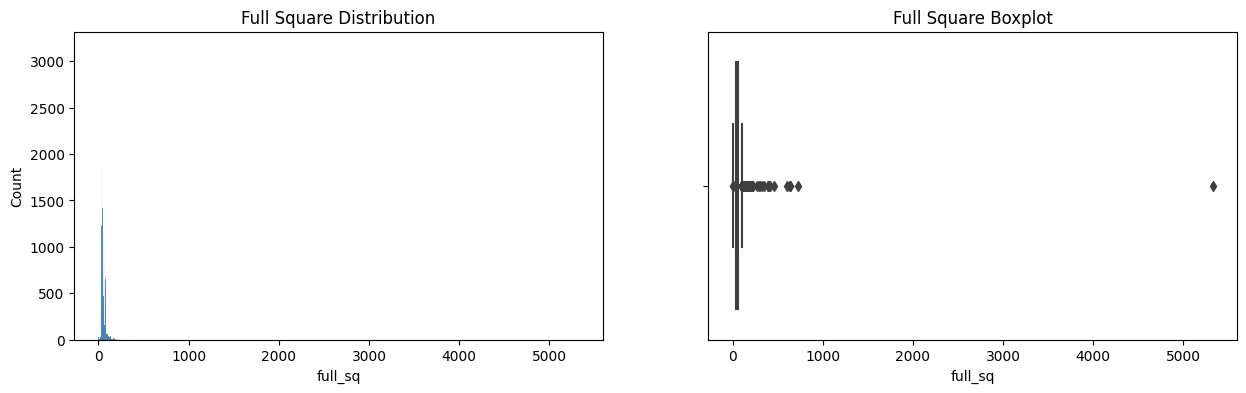

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

Алгоритм метода:

→ вычислить 25-ый и 75-ый квантили (первый и третий квартили) — и  для признака, который мы исследуем;

→ вычислить межквартильное расстояние:

→ вычислить верхнюю и нижнюю границы Тьюки: 

→ найти наблюдения, которые выходят за пределы границ.

Квантили вычисляются с помощью метода quantile(). Потенциальные выбросы определяются при помощи фильтрации данных по условию выхода за пределы верхней или нижней границы.

In [46]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned



In [47]:
# Применим эту функцию к таблице sber_data и признаку full_sq, а также выведем
# размерности результатов:
outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


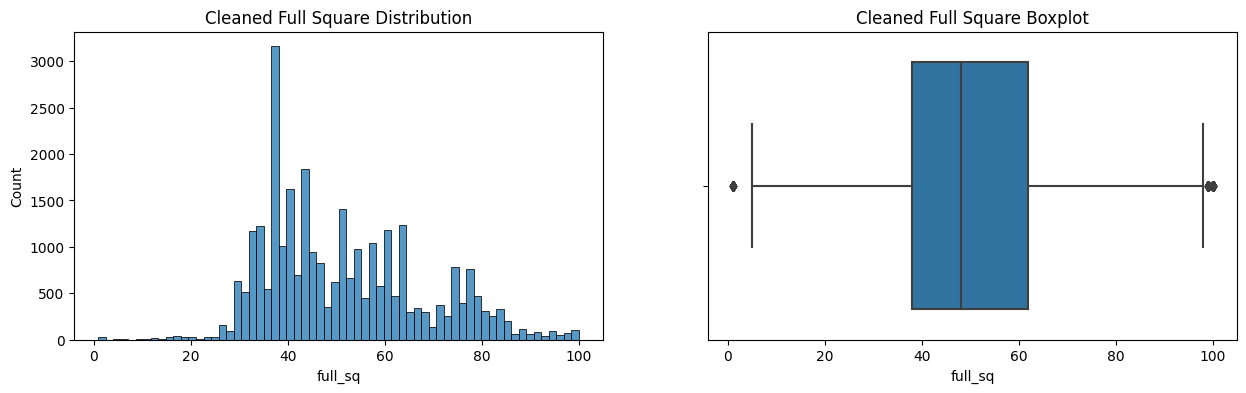

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

In [49]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', left=1, right=6)

Если мы построим гистограмму и коробчатую диаграмму на полученных данных, то увидим вот такую картинку:

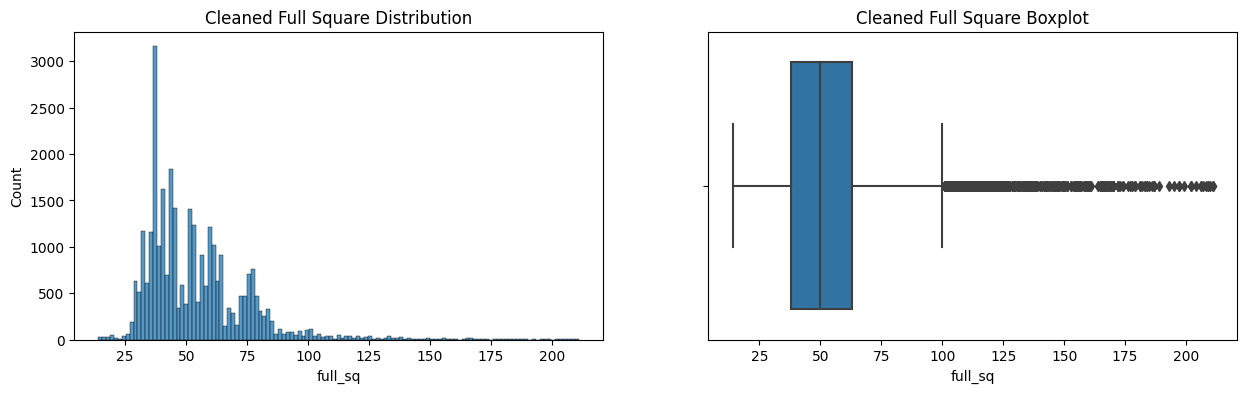

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

In [51]:
# Согласитесь, это уже больше похоже на реальный рынок недвижимости: основная часть 
# квартир имеет площадь в интервале от 25 до 85 кв. м, а далее частота наблюдений
# постепенно падает.

МЕТОД Z-ОТКЛОНЕНИЙ (МЕТОД СИГМ)

Последний метод, который мы рассмотрим, — это метод, основанный на правиле трёх сигм для нормального распределения. 

Правило трёх сигм гласит: если распределение данных является нормальным, то 99,73 % лежат в интервале от (мю - 3\*сигма, мю + 3\*сигма), где   (мю) — математическое ожидание (для выборки это среднее значение), а  (сигма) — стандартное отклонение. Наблюдения, которые лежат за пределами этого интервала, будут считаться выбросами.

А что делать, если данные не распределены нормально? 

На такой случай есть один трюк. Иногда для распределений, похожих на логнормальное, может помочь логарифмирование. Оно может привести исходное распределение к подобию нормального. Причем, основание логарифма может быть любым.

Построим две гистограммы признака расстояния до МКАД (mkad_km): первая — в обычном масштабе, а вторая — в логарифмическом. Логарифмировать будем с помощью функции log() из библиотеки numpy (натуральный логарифм — логарифм по основанию числа e). Признак имеет среди своих значений 0. Из математики известно, что логарифма от 0 не существует, поэтому мы прибавляем к нашему признаку 1, чтобы не логарифмировать нули и не получать предупреждения.

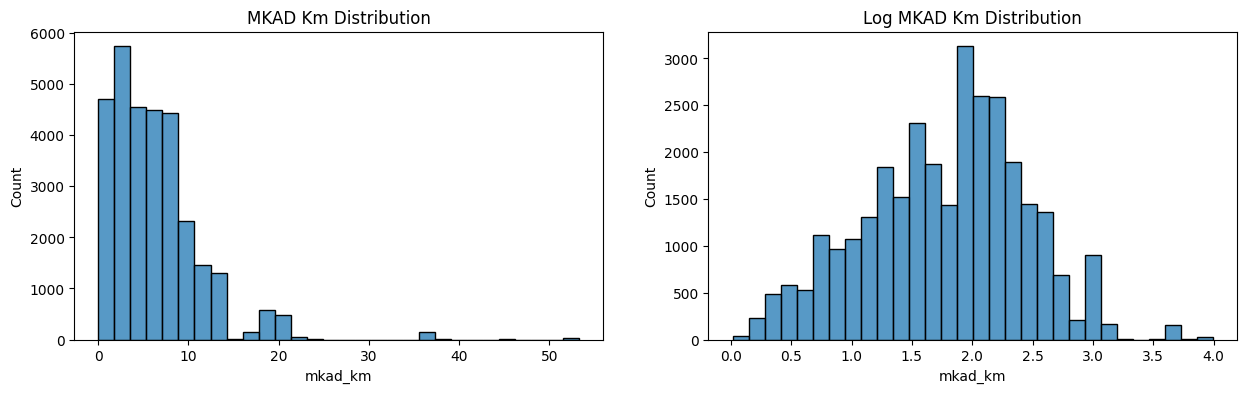

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

Левое распределение напоминает логнормальное распределение с наличием потенциальных выбросов-«пеньков», далеко отстоящих от основной массы наблюдений.

Взяв натуральный логарифм от левого распределения, мы получаем правое, которое напоминает слегка перекошенное нормальное. Слева от моды (самого высокого столбика) наблюдается чуть больше наблюдений, нежели справа. По-научному это будет звучать так: «распределение имеет левостороннюю асимметрию».

Примечание

In [53]:
# Численный показатель асимметрии можно вычислить с помощью метода: skew():
print(log_mkad_km.skew())

-0.14263612203024953


Асимметрия распределения называется правосторонней, если она положительная.
Асимметрия распределения называется левосторонней, если она отрицательная.

Реализуем алгоритм метода z-отклонения

Напишем функцию outliers_z_score(), которая реализует этот алгоритм. 

На вход она принимает DataFrame и признак, по которому ищутся выбросы. В дополнение добавим в функцию возможность работы в логарифмическом масштабе: для этого введём аргумент log_scale. Если он равен True, то будем логарифмировать рассматриваемый признак, иначе — оставляем его в исходном виде.

Как и раньше, функция будет возвращать выбросы и очищенные от них данные:

In [54]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [55]:
# Применим эту функцию к таблице sber_data и признаку mkad_km, а также выведем
# размерности результатов:

outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438


In [56]:
print(outliers['sub_area'].unique())

['Poselenie Rogovskoe' 'Poselenie Kievskij']


Возможно, мы не учли того факта, что наш логарифм распределения всё-таки не идеально нормален и в нём присутствует некоторая асимметрия. Возможно, стоит дать некоторое «послабление» на границы интервалов? Давайте отдельно построим гистограмму прологарифмированного распределения, а также отобразим на гистограмме вертикальные линии, соответствующие среднему (центру интервала в методе трёх сигм) и границы интервала . Вертикальные линии можно построить с помощью метода axvline(). Для среднего линия будет обычной, а для границ интервала — пунктирной (параметр ls ='--'):

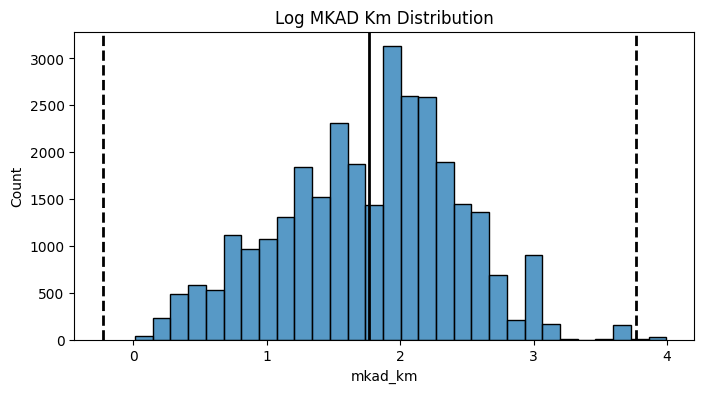

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

Итак, что мы графически построили интервал метода трёх сигм поверх нашего распределения. Он показывает, какие наблюдения мы берем в интервал, а какие считаем выбросами. Легко заметить, среднее значение (жирная вертикальная линия) находится левее моды, это свойство распределений с левосторонней асимметрией. Также видны наблюдения, которые мы не захватили своим интервалом (небольшой пенек правее верхней границы) — это и есть наши квартиры из из поселений "Роговское" и "Киевский". Очевидно, что если немного (меньше чем на одну сигму) "сдвинуть" верхнюю границу вправо, мы захватим эти наблюдения. Давайте сделаем это?!

Давайте расширим правило трёх сигм, чтобы иметь возможность особенности данных. Добавьте в функцию outliers_z_score() параметры left и right, которые будут задавать число сигм (стандартных отклонений) влево и вправо соответственно, определяющее границы метода z-отклонения. По умолчанию оба параметры равны 3. Результирующую функцию назовите outliers_z_score_mod().

In [58]:
def outliers_z_score_mod(data: pd.DataFrame, feature, log_scale=False, left=3, right=3):
    x: pd.Series
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left*sigma
    upper_bound = mu + right*sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [72]:
# Проверьте, что будет, если дать «послабление» вправо, увеличив число сигм.
# Наша задача — узнать, начиная с какой границы поселения «Роговское» и «Киевское» 
# перестают считаться выбросами. Примените свою функцию outliers_z_score_mod() к 
# признаку mkad_km с параметрами left=3, right=3.5, log_scale=True. Чему равно 
# результирующее число выбросов?

outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True, left=3, right=3)
outliers.shape

(33, 61)

<center>ДРУГИЕ МЕТОДЫ ПОИСКА ВЫБРОСОВ

Задание 6.5

Постройте гистограмму для признака price_doc в логарифмическом масштабе. А также, добавьте на график линии, отображающие среднее и границы интервала для метода трех сигм. Выберите верные утверждения:

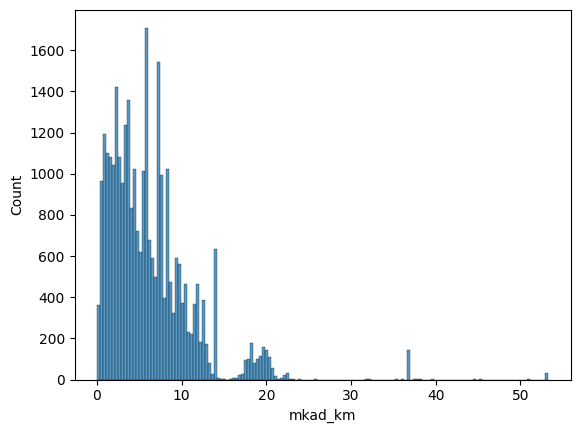

In [68]:
sns.histplot(
    sber_data['mkad_km']
);

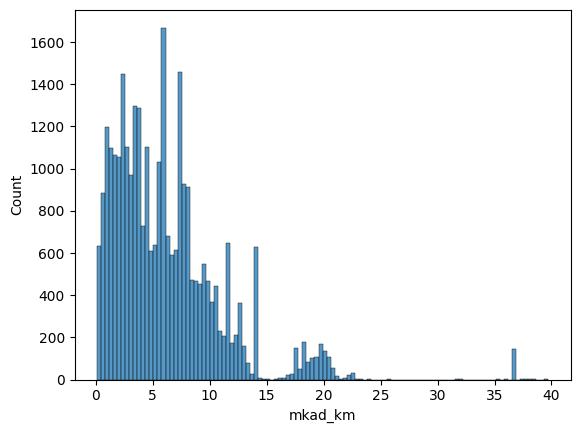

In [71]:
sns.histplot(
    cleaned['mkad_km']
);

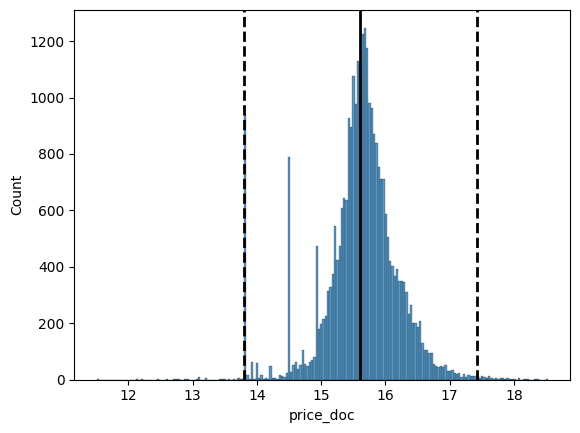

In [77]:
log_price_doc = np.log(sber_data['price_doc'])
histplot = sns.histplot(
    log_price_doc
)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean() - 3*log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean() + 3*log_price_doc.std(), color='k', ls='--', lw=2);

In [92]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', log_scale=True, left=3.7, right=3.7)
outliers.shape

(52, 61)

In [95]:
def outliers_iqr_mod(data, feature, log_scale=False, left=1.5, right=1.5):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [96]:
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', log_scale=True, left=3, right=3)
outliers.shape

(92, 61)

7. Работа с дубликатами и неинформативными признаками